# Importing the necessary libraries

In [63]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import time

# Loading the necessary dataset

In [64]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


Here i have loaded the CIFAR10 dataset and split them in testing and training set

# Preprocessing of the dataset

Since the pixel are distributed from 0 to 255 in terms of its brightness we divide it by 255 to scale the dataset

We also convert the labels (y_train and y_test) into one-hot encoded vectors using the to_categorical function from TensorFlow. This step is necessary because the neural network will output predictions in the same format.

In [65]:
# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


We split the training data into training and validation sets using the train_test_split function from scikit-learn. The test_size=0.2 argument specifies that 20% of the training data will be used for validation. The random_state=42 argument sets a fixed random seed for reproducibility.


In [66]:
# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Defining the model architechture

In [67]:
# Define the model architecture
def create_model(filters, kernel_size, pool_size, dense_units, learning_rate):
    model = Sequential()
    model.add(Conv2D(filters, kernel_size, activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=pool_size))
    model.add(Flatten())
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


We define a function create_model that takes the hyperparameters as arguments and returns a compiled model. The model architecture consists of a Conv2D layer with the specified number of filters and kernel size, followed by a MaxPooling2D layer with the specified pool size. The output is flattened and passed through a Dense layer with the specified number of units. Finally, a Dense layer with 10 units and a softmax activation is added to produce class probabilities.





In [68]:
# Define the hyperparameters to experiment with
filters_values = [16, 32, 64, 128]
kernel_sizes = [(3, 3), (5, 5)]
pool_sizes = [(2, 2), (3, 3)]
dense_units_values = [64, 128]
learning_rates = [0.001, 0.01]



Here, we define the lists of hyperparameter values to experiment with. These lists represent the different combinations we want to test for each hyperparameter

In [69]:
# Create a dataframe to store the results
results = pd.DataFrame(columns=['Filters', 'Kernel Size', 'Pool Size', 'Dense Units', 'Learning Rate', 'Accuracy'])


We create an empty Pandas DataFrame called results to store the experiment results. The DataFrame has columns to store the hyperparameters (Filters, Kernel Size, Pool Size, Dense Units, Learning Rate) and the accuracy metric (Accuracy).

# Factorial Design

In [70]:
start_time = time.time()
# Perform the factorial design experiment
for filters in filters_values:
    for kernel_size in kernel_sizes:
        for pool_size in pool_sizes:
            for dense_units in dense_units_values:
                for learning_rate in learning_rates:
                    # Create and compile the model
                    model = create_model(filters, kernel_size, pool_size, dense_units, learning_rate)
                    
                    # Train the model
                    model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val), verbose=0)
                    
                    # Evaluate the model on the test set
                    y_pred = model.predict(x_test)
                    y_pred = np.argmax(y_pred, axis=1)
                    y_true = np.argmax(y_test, axis=1)
                    
                    # Calculate performance metrics
                    accuracy = accuracy_score(y_true, y_pred)
                    precision = precision_score(y_true, y_pred, average='macro')
                    recall = recall_score(y_true, y_pred, average='macro')
                    f1 = f1_score(y_true, y_pred, average='macro')
                    
                    # Store the results in the dataframe
                    results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
                                              'Dense Units': dense_units, 'Learning Rate': learning_rate,
                                              'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1},
                                             ignore_index=True)

end_time = time.time()

/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 2ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 2ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 2ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 2ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 2ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 2ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 2ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 2ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 2ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 2ms/step


/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.expe

313/313 [==============================] - 1s 3ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 3ms/step


/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.expe

313/313 [==============================] - 1s 2ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 2ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 2ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 2ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 3ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 3ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 3ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 3ms/step


/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.expe

313/313 [==============================] - 1s 2ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 2ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 2ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 2ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 3ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 3ms/step


/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.expe

313/313 [==============================] - 1s 3ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 3ms/step


/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.expe

313/313 [==============================] - 1s 3ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 3ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 3ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 3ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 3ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 3ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 4ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 4ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 3ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 3ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 3ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 3ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 4ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 4ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 4ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 4ms/step


/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.expe

313/313 [==============================] - 1s 4ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 4ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 4ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 4ms/step


/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.expe

313/313 [==============================] - 2s 5ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 2s 5ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 2s 5ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 2s 5ms/step


/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.expe

313/313 [==============================] - 1s 4ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 4ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 5ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 5ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 2s 5ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 2s 5ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 2s 6ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 2s 6ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 2s 5ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 2s 5ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 2s 5ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,
/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 2s 5ms/step


/var/folders/cf/qy3qgj991bj_7z763jtvlyw80000gn/T/ipykernel_25777/719207451.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Filters': filters, 'Kernel Size': kernel_size, 'Pool Size': pool_size,


This section performs the factorial design experiment using nested loops. For each combination of hyperparameters, the following steps are executed:

+ Create and compile the model with the current set of hyperparameters.
+ Train the model on the training data (x_train and y_train) for 10 epochs, using a batch size of 128 and the validation data (x_val and y_val) for validation.
+ Evaluate the trained model on the test data (x_test and y_test) and retrieve the accuracy.
+ Store the hyperparameters and accuracy in the results dataframe using the append method.

In [71]:
# Print the performance analysis metrics
print(results)

# Additional metrics
max_accuracy = results['Accuracy'].max()
best_model = results[results['Accuracy'] == max_accuracy].iloc[0]
print("\nBest Model:")
print(best_model)
print("Time Taken for computation:\t", end_time - start_time)


   Filters Kernel Size Pool Size Dense Units  Learning Rate  Accuracy  \
0       16      (3, 3)    (2, 2)          64          0.001    0.6162   
1       16      (3, 3)    (2, 2)          64          0.010    0.5141   
2       16      (3, 3)    (2, 2)         128          0.001    0.6181   
3       16      (3, 3)    (2, 2)         128          0.010    0.4817   
4       16      (3, 3)    (3, 3)          64          0.001    0.6154   
..     ...         ...       ...         ...            ...       ...   
59     128      (5, 5)    (2, 2)         128          0.010    0.3950   
60     128      (5, 5)    (3, 3)          64          0.001    0.6493   
61     128      (5, 5)    (3, 3)          64          0.010    0.4959   
62     128      (5, 5)    (3, 3)         128          0.001    0.6686   
63     128      (5, 5)    (3, 3)         128          0.010    0.5254   

    Precision  Recall  F1-score  
0    0.615473  0.6162  0.612736  
1    0.507370  0.5141  0.501827  
2    0.627239  0.6181

Finally, we print the results dataframe to display the hyperparameters and corresponding accuracies for each combination.

Additionally, we compute additional metrics by finding the maximum accuracy from the Accuracy column using max() function. We then retrieve the row corresponding to the best model using boolean indexing (results['Accuracy'] == max_accuracy). The .iloc[0] retrieves the first row in case multiple rows have the same maximum accuracy. Finally, we print the details of the best model.

Note that you can customize and add more performance analysis metrics based on your specific requirements by calculating them within the nested loops or by analyzing the results dataframe.

###### The performance for the best model

In [72]:
# Find the index of the best model
best_model_idx = results['Accuracy'].idxmax()
# Additional metrics
max_accuracy = results['Accuracy'].max()
best_model = results[results['Accuracy'] == max_accuracy].iloc[0]

# Print the performance metrics for the best model
print("\nBest Model Performance Metrics:")
print("Accuracy:", best_model['Accuracy'])
print("Precision:", best_model['Precision'])
print("Recall:", best_model['Recall'])
print("F1-score:", best_model['F1-score'])


Best Model Performance Metrics:
Accuracy: 0.6772
Precision: 0.6795056067666269
Recall: 0.6772
F1-score: 0.675121197291065


# Graphs

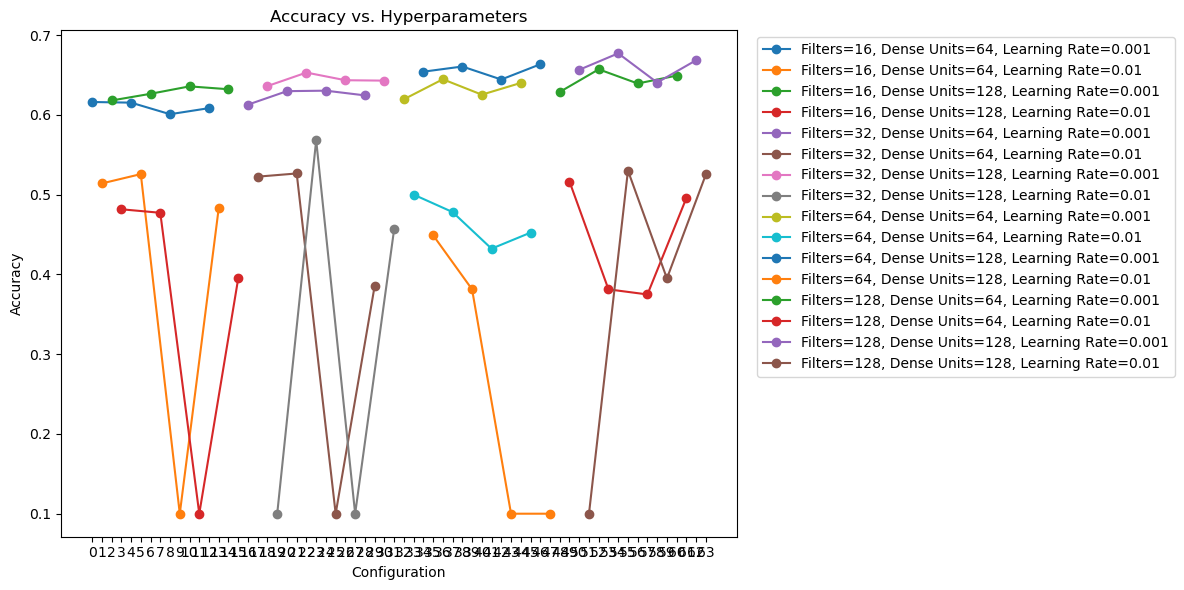

In [73]:
import matplotlib.pyplot as plt

# Plot accuracy vs. hyperparameters
plt.figure(figsize=(12, 6))
for filters in filters_values:
    for dense_units in dense_units_values:
        for learning_rate in learning_rates:
            subset = results[(results['Filters'] == filters) &
                             (results['Dense Units'] == dense_units) &
                             (results['Learning Rate'] == learning_rate)]
            label = f"Filters={filters}, Dense Units={dense_units}, Learning Rate={learning_rate}"
            plt.plot(subset.index, subset['Accuracy'], label=label, marker='o')

plt.xlabel('Configuration')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Hyperparameters')
plt.xticks(ticks=range(len(results)))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [74]:
# Get the best model
best_model = create_model(results.loc[best_model_idx, 'Filters'],
                          results.loc[best_model_idx, 'Kernel Size'],
                          results.loc[best_model_idx, 'Pool Size'],
                          results.loc[best_model_idx, 'Dense Units'],
                          results.loc[best_model_idx, 'Learning Rate'])

# Train the best model
best_model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val), verbose=0)


/Users/sagnikchakravarty/anaconda3/envs/TensorFlow/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 5ms/step

Best Model Performance Metrics:
Accuracy: 0.6769
Precision: 0.683129598083473
Recall: 0.6769000000000001
F1-score: 0.6743594330850653


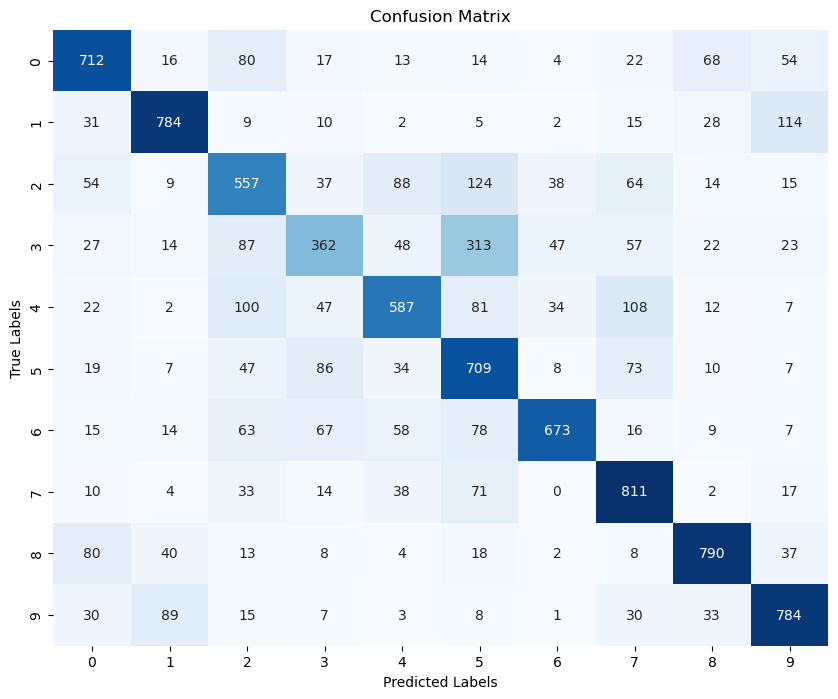

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns

# Evaluate the best model on the test set
y_pred = best_model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate performance metrics for the best model
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print performance metrics for the best model
print("\nBest Model Performance Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# VggNet

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Load the VGG16 model without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base layers
base_model.trainable = False

# Create a new model on top of the VGG16 base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
optimizer = Adam(lr=0.0001)  # Use a smaller learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Start the timer
start_time = time.time()

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

# End the timer
end_time = time.time()

# Evaluate the model on the test set
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate performance metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Print the time taken to run the code
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")

# Calculate and print the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)


Epoch 1/10
391/391 [==============================] - 94s 240ms/step - loss: 1.3661 - accuracy: 0.5257 - val_loss: 1.2089 - val_accuracy: 0.5752
Epoch 2/10
391/391 [==============================] - 93s 238ms/step - loss: 1.1284 - accuracy: 0.6029 - val_loss: 1.1830 - val_accuracy: 0.5842
Epoch 3/10
391/391 [==============================] - 93s 238ms/step - loss: 1.0485 - accuracy: 0.6308 - val_loss: 1.1162 - val_accuracy: 0.6076
Epoch 4/10
391/391 [==============================] - 93s 239ms/step - loss: 0.9766 - accuracy: 0.6572 - val_loss: 1.1203 - val_accuracy: 0.6113
Epoch 5/10
391/391 [==============================] - 93s 238ms/step - loss: 0.9149 - accuracy: 0.6746 - val_loss: 1.1226 - val_accuracy: 0.6178
Epoch 6/10
391/391 [==============================] - 93s 239ms/step - loss: 0.8498 - accuracy: 0.6966 - val_loss: 1.1309 - val_accuracy: 0.6199
Epoch 7/10
391/391 [==============================] - 94s 240ms/step - loss: 0.7791 - accuracy: 0.7211 - val_loss: 1.1639 - val_ac

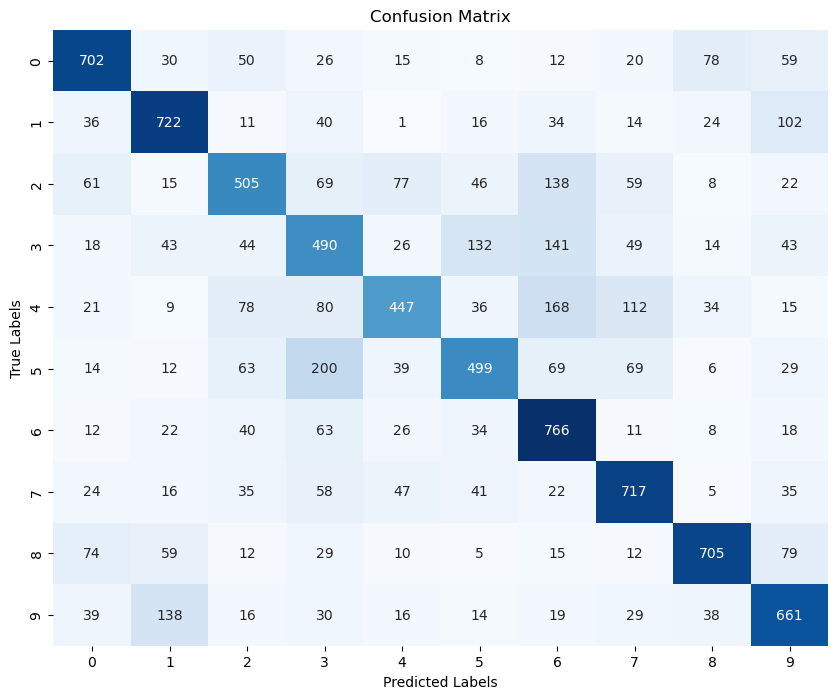

In [27]:
import seaborn as sns
# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# DenseNet

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Load the DenseNet121 model without the top classification layer
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Increase the number of trainable layers
base_model.trainable = True

# Create a new model on top of the DenseNet121 base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
optimizer = Adam(lr=0.0001)  # Use a smaller learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Start the timer
start_time = time.time()

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

# End the timer
end_time = time.time()

# Evaluate the model on the test set
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate performance metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Print the time taken to run the code
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")

# Calculate and print the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)



29084464/29084464 [==============================] - 4s 0us/step


Epoch 1/10
391/391 [==============================] - 161s 387ms/step - loss: 1.0435 - accuracy: 0.6482 - val_loss: 1.0435 - val_accuracy: 0.6708
Epoch 2/10
391/391 [==============================] - 150s 385ms/step - loss: 0.5729 - accuracy: 0.8115 - val_loss: 0.6497 - val_accuracy: 0.7808
Epoch 3/10
391/391 [==============================] - 150s 384ms/step - loss: 0.4278 - accuracy: 0.8580 - val_loss: 0.7510 - val_accuracy: 0.7529
Epoch 4/10
391/391 [==============================] - 151s 387ms/step - loss: 0.3376 - accuracy: 0.8853 - val_loss: 0.7090 - val_accuracy: 0.7844
Epoch 5/10
391/391 [==============================] - 154s 392ms/step - loss: 0.2815 - accuracy: 0.9042 - val_loss: 0.5816 - val_accuracy: 0.8153
Epoch 6/10
391/391 [==============================] - 155s 396ms/step - loss: 0.2384 - accuracy: 0.9180 - val_loss: 0.6903 - val_accuracy: 0.7937
Epoch 7/10
391/391 [==============================] - 156s 399ms/step - loss: 0.2086 - accuracy: 0.9284 - val_loss: 0.8381 -

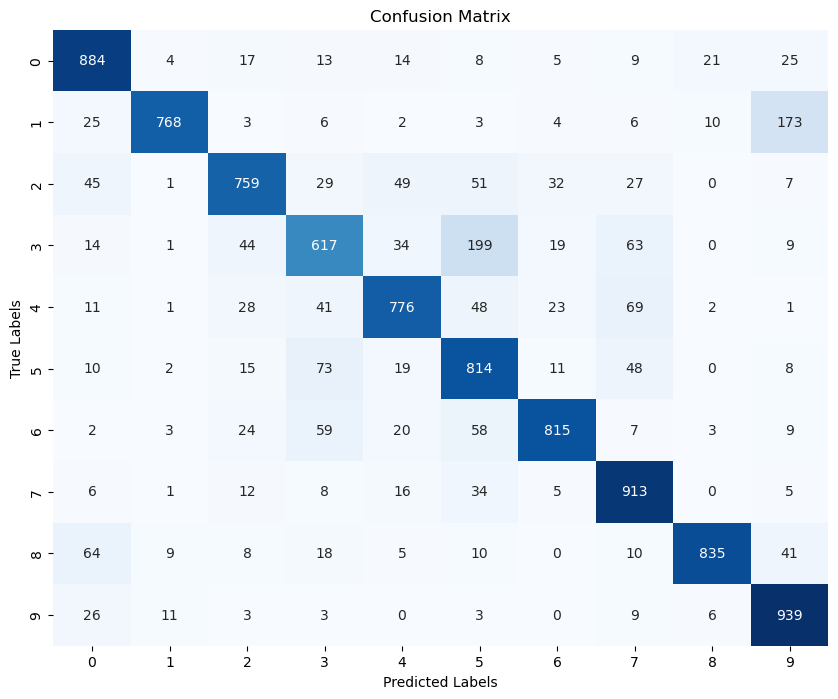

In [31]:
import seaborn as sns
# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ResNet

In [32]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Load the ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base layers
base_model.trainable = False

# Create a new model on top of the ResNet50 base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
optimizer = Adam(lr=0.0001)  # Use a smaller learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Start the timer
start_time = time.time()

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

# End the timer
end_time = time.time()

# Evaluate the model on the test set
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate performance metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Print the time taken to run the code
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")

# Calculate and print the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

Epoch 1/10
391/391 [==============================] - 64s 162ms/step - loss: 2.2106 - accuracy: 0.2445 - val_loss: 1.8693 - val_accuracy: 0.3148
Epoch 2/10
391/391 [==============================] - 62s 158ms/step - loss: 1.8914 - accuracy: 0.3047 - val_loss: 1.9115 - val_accuracy: 0.2933
Epoch 3/10
391/391 [==============================] - 64s 163ms/step - loss: 1.8283 - accuracy: 0.3337 - val_loss: 1.7779 - val_accuracy: 0.3629
Epoch 4/10
391/391 [==============================] - 62s 158ms/step - loss: 1.7789 - accuracy: 0.3519 - val_loss: 1.7545 - val_accuracy: 0.3649
Epoch 5/10
391/391 [==============================] - 61s 155ms/step - loss: 1.7578 - accuracy: 0.3607 - val_loss: 1.7407 - val_accuracy: 0.3678
Epoch 6/10
391/391 [==============================] - 60s 153ms/step - loss: 1.7334 - accuracy: 0.3703 - val_loss: 1.7781 - val_accuracy: 0.3558
Epoch 7/10
391/391 [==============================] - 60s 154ms/step - loss: 1.7183 - accuracy: 0.3789 - val_loss: 1.7874 - val_ac

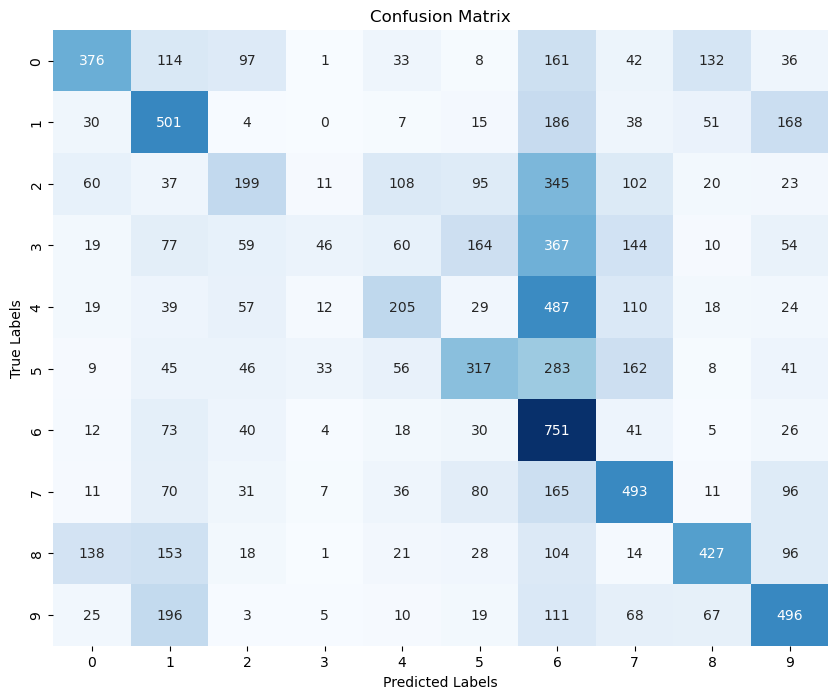

In [33]:
import seaborn as sns
# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# CNN

In [45]:
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to categorical
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Start the timer
start_time = time.time()

# Train the model
batch_size = 128
epochs = 10
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

# End the timer
end_time = time.time()

# Evaluate the model
_, accuracy = model.evaluate(x_test, y_test)
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate performance metrics
precision = precision_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), y_pred, average='weighted')

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Print the execution time
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")


Epoch 1/10
391/391 [==============================] - 9s 23ms/step - loss: 1.6009 - accuracy: 0.4137 - val_loss: 1.3789 - val_accuracy: 0.5173
Epoch 2/10
391/391 [==============================] - 9s 23ms/step - loss: 1.2320 - accuracy: 0.5637 - val_loss: 1.1947 - val_accuracy: 0.5814
Epoch 3/10
391/391 [==============================] - 9s 23ms/step - loss: 1.0740 - accuracy: 0.6240 - val_loss: 1.0114 - val_accuracy: 0.6441
Epoch 4/10
391/391 [==============================] - 9s 23ms/step - loss: 0.9557 - accuracy: 0.6653 - val_loss: 0.9386 - val_accuracy: 0.6708
Epoch 5/10
391/391 [==============================] - 9s 22ms/step - loss: 0.8747 - accuracy: 0.6963 - val_loss: 0.9010 - val_accuracy: 0.6876
Epoch 6/10
391/391 [==============================] - 9s 23ms/step - loss: 0.8051 - accuracy: 0.7196 - val_loss: 0.9543 - val_accuracy: 0.6727
Epoch 7/10
391/391 [==============================] - 9s 23ms/step - loss: 0.7450 - accuracy: 0.7412 - val_loss: 0.8464 - val_accuracy: 0.7097

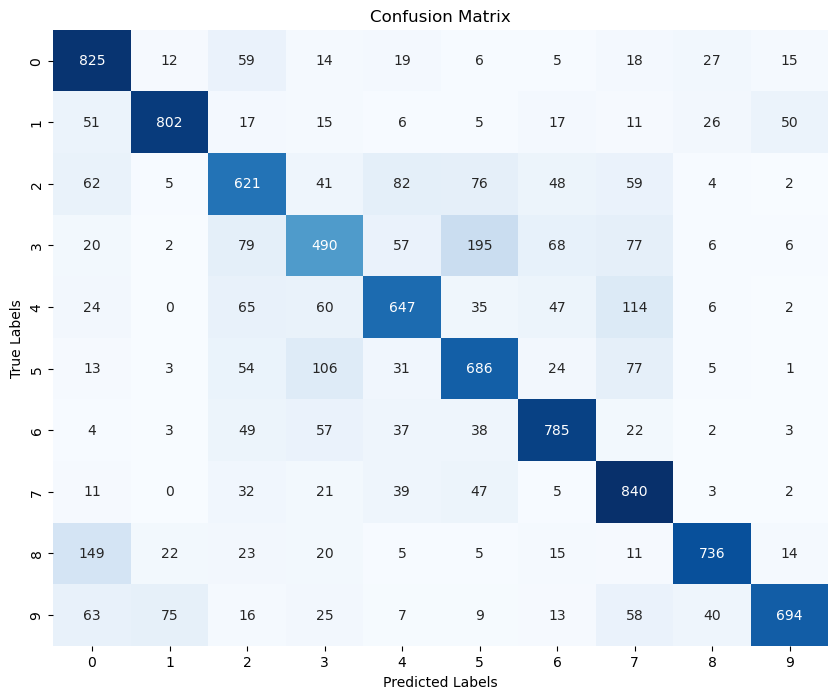

In [47]:
import seaborn as sns
# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# GoogleLeNet

In [80]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Concatenate, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define the GoogLeNet architecture
def inception_module(x, filters):
    tower_1 = Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    tower_1 = Conv2D(filters[1], (3, 3), padding='same', activation='relu')(tower_1)

    tower_2 = Conv2D(filters[2], (1, 1), padding='same', activation='relu')(x)
    tower_2 = Conv2D(filters[3], (5, 5), padding='same', activation='relu')(tower_2)

    tower_3 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    tower_3 = Conv2D(filters[4], (1, 1), padding='same', activation='relu')(tower_3)

    output = Concatenate(axis=-1)([tower_1, tower_2, tower_3])
    return output

def create_googlenet():
    input_layer = Input(shape=(32, 32, 3))

    # Stage 1
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Stage 2
    x = Conv2D(64, (1, 1), padding='same', activation='relu')(x)
    x = Conv2D(192, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Stage 3
    x = inception_module(x, [64, 96, 128, 16, 32])
    x = inception_module(x, [128, 128, 192, 32, 96])
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Stage 4
    x = inception_module(x, [192, 96, 208, 16, 48])
    x = inception_module(x, [160, 112, 224, 24, 64])
    x = inception_module(x, [128, 128, 256, 24, 64])
    x = inception_module(x, [112, 144, 288,32, 64])
    x = inception_module(x, [256, 160, 320, 32, 128])
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Stage 5
    x = inception_module(x, [256, 160, 320, 32, 128])
    x = inception_module(x, [384, 192, 384, 48, 128])

    # Apply global average pooling
    x = GlobalAveragePooling2D()(x)

    # Output layer
    output_layer = Dense(10, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# Create and compile the GoogLeNet model
model = create_googlenet()
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# Train the model
start_time = time.time()
model.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=15, validation_data=(x_test, y_test))
end_time = time.time()
runtime = end_time - start_time

# Evaluate the model on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Print the performance analysis metrics and runtime
print("Performance Analysis Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

print("Runtime:", runtime, "seconds")


Epoch 1/15
391/391 [==============================] - 109s 278ms/step - loss: 2.2935 - accuracy: 0.1206 - val_loss: 2.3147 - val_accuracy: 0.1000
Epoch 2/15
391/391 [==============================] - 107s 274ms/step - loss: 2.1148 - accuracy: 0.1743 - val_loss: 1.9094 - val_accuracy: 0.2469
Epoch 3/15
391/391 [==============================] - 107s 274ms/step - loss: 1.8869 - accuracy: 0.2527 - val_loss: 1.8139 - val_accuracy: 0.2784
Epoch 4/15
391/391 [==============================] - 107s 273ms/step - loss: 1.6940 - accuracy: 0.3314 - val_loss: 1.6557 - val_accuracy: 0.3502
Epoch 5/15
391/391 [==============================] - 104s 266ms/step - loss: 1.5747 - accuracy: 0.3958 - val_loss: 1.4509 - val_accuracy: 0.4566
Epoch 6/15
391/391 [==============================] - 103s 264ms/step - loss: 1.4781 - accuracy: 0.4525 - val_loss: 1.3678 - val_accuracy: 0.5024
Epoch 7/15
391/391 [==============================] - 106s 271ms/step - loss: 1.3525 - accuracy: 0.5051 - val_loss: 1.2655 -

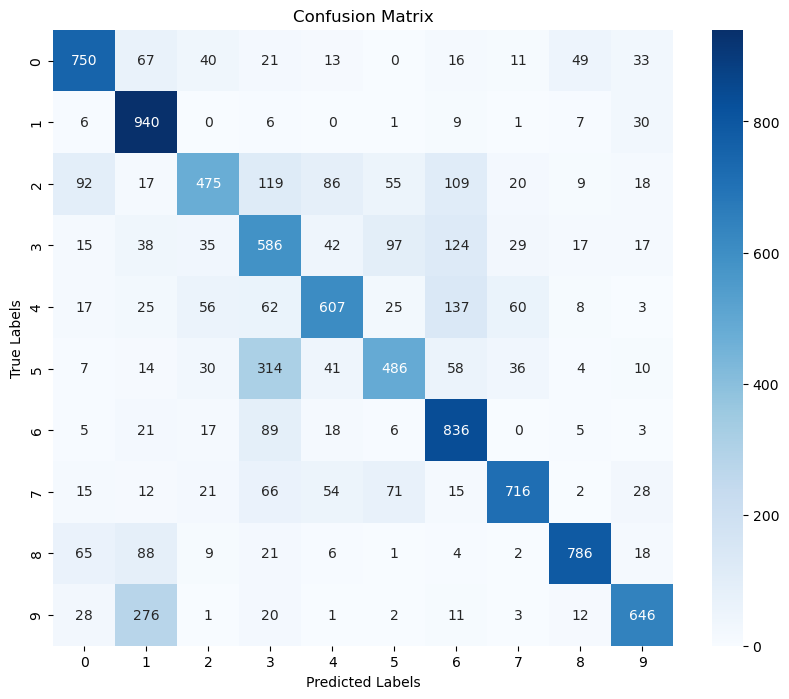

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
